In [10]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import keras as ks
import spotipy

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

from sklearn import preprocessing
from sklearn import model_selection

# Spotify EDM Classifier

The goal of this project is to play around with Spotify's Web API and see what learning we can achieve using their audio features they publish for each track. I'll be using Keras to create a deep learning model capable of distinguishing songs as either EDM or not, and then hopefully expanding this to inferring multilclass genres. 

In the file DataframeMaker, I leveraged Spotipy to pull around 20k songs from Spotify and split them into groups of EDM or non-EDM. Check out that file to understand where the CSV files in the repo came from. 


In [3]:
df = pd.read_csv('data.csv')
df2 = pd.read_csv('data2.csv')

#Using one-hot encoding here
labels = ks.utils.np_utils.to_categorical([1 for _ in range(df.shape[0])] + [0 for _ in range(df2.shape[0])])

df3 = df.append(df2)
data3 = df3.values

#Dropping index column in Dataframe - can be solved when creating it 
#in the first place setting index parameter to false.
data3 = np.delete(data3, 0, axis=1)

Here we'll process our data before we train a model - we have to normalize and split into test and train sets

In [4]:
xTrain, xTest, yTrain, yTest = sk.model_selection.train_test_split(data3, labels, test_size=.25)

In [5]:
#Scaling our data to follow a standard normal distribution, i.e. mean = 0 and STD = 1
scaler = preprocessing.StandardScaler().fit(xTrain)
trainScaled = scaler.transform(xTrain)
testScaled = scaler.transform(xTest)

# MODEL TIME WOOOOO

We have a lot of data which is great, so we can use a neural net to classify this data somewhat safely. I'm going to use a "simple", fully-connected feed forward network with binary output to work with out one hot encoding. 

In [78]:
model = Sequential()
model.add(Dense(16, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='relu'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [79]:
history = model.fit(trainScaled, yTrain, validation_split=.1, epochs=100, batch_size=64)

Train on 13734 samples, validate on 1527 samples
Epoch 1/100
13734/13734 [==============================] - 1s 91us/step - loss: 1.6523 - acc: 0.5838 - val_loss: 1.1386 - val_acc: 0.6549
Epoch 2/100
13734/13734 [==============================] - 0s 29us/step - loss: 0.9283 - acc: 0.6802 - val_loss: 0.9130 - val_acc: 0.7020
Epoch 3/100
13734/13734 [==============================] - 0s 26us/step - loss: 0.7567 - acc: 0.7116 - val_loss: 0.7524 - val_acc: 0.7063
Epoch 4/100
13734/13734 [==============================] - 0s 30us/step - loss: 0.6658 - acc: 0.7227 - val_loss: 0.6940 - val_acc: 0.7207
Epoch 5/100
13734/13734 [==============================] - 0s 30us/step - loss: 0.6418 - acc: 0.7306 - val_loss: 0.6654 - val_acc: 0.7240
Epoch 6/100
13734/13734 [==============================] - 0s 28us/step - loss: 0.6273 - acc: 0.7399 - val_loss: 0.6481 - val_acc: 0.7335
Epoch 7/100
13734/13734 [==============================] - 0s 29us/step - loss: 0.6166 - acc: 0.7451 - val_loss: 0.6184 - v

13734/13734 [==============================] - 1s 42us/step - loss: 0.5525 - acc: 0.7704 - val_loss: 0.6033 - val_acc: 0.7747
Epoch 60/100
13734/13734 [==============================] - 1s 42us/step - loss: 0.5454 - acc: 0.7746 - val_loss: 0.5981 - val_acc: 0.7688
Epoch 61/100
13734/13734 [==============================] - 1s 40us/step - loss: 0.5483 - acc: 0.7723 - val_loss: 0.5993 - val_acc: 0.7731
Epoch 62/100
13734/13734 [==============================] - 1s 38us/step - loss: 0.5501 - acc: 0.7733 - val_loss: 0.6371 - val_acc: 0.7652
Epoch 63/100
13734/13734 [==============================] - 0s 35us/step - loss: 0.5556 - acc: 0.7729 - val_loss: 0.5775 - val_acc: 0.7711
Epoch 64/100
13734/13734 [==============================] - 1s 50us/step - loss: 0.5500 - acc: 0.7729 - val_loss: 0.6286 - val_acc: 0.7649
Epoch 65/100
13734/13734 [==============================] - 1s 50us/step - loss: 0.5483 - acc: 0.7715 - val_loss: 0.6103 - val_acc: 0.7672
Epoch 66/100
13734/13734 [==============

This will be used to visualize our training data's accuracy over time as the model learns, to try and pin down an epoch where it plateaus or starts overfitting.

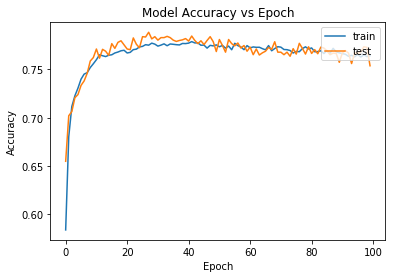

In [80]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

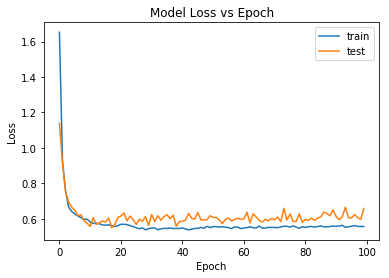

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [82]:
model.evaluate(testScaled, yTest)


5088/5088 [==============================] - 0s 35us/step


[0.6103921583238637, 0.754127358490566]